Found 2000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


/opt/anaconda3/envs/indata_sp25/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


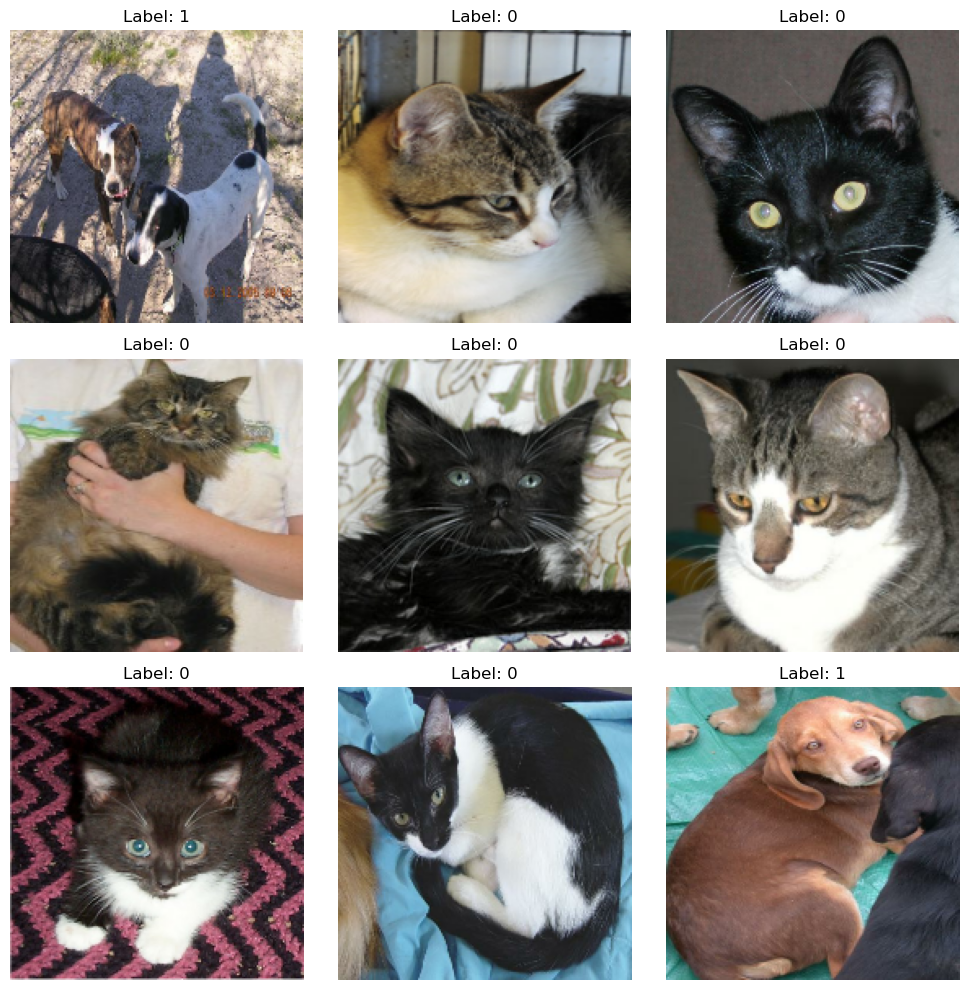

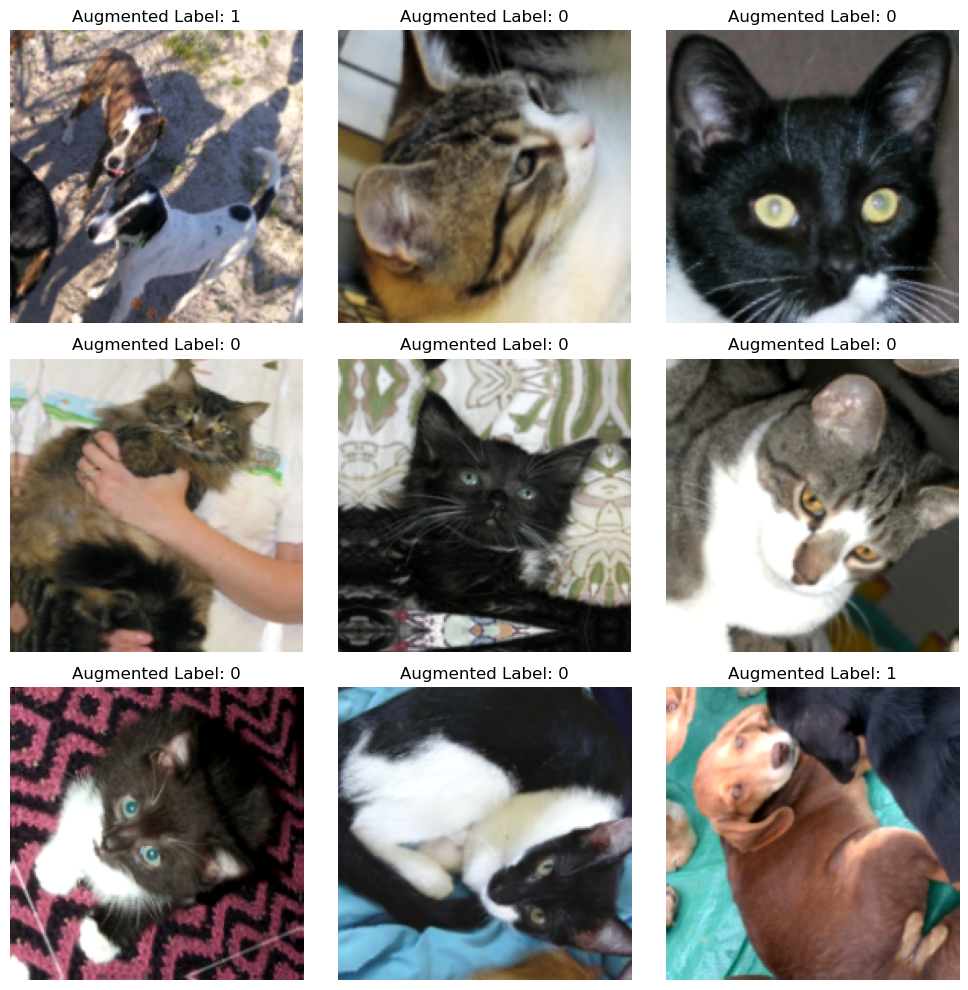

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step - accuracy: 0.5373 - loss: 0.9203 - val_accuracy: 0.6800 - val_loss: 0.6337
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - accuracy: 0.6327 - loss: 0.6559 - val_accuracy: 0.6440 - val_loss: 0.6146
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 227ms/step - accuracy: 0.6718 - loss: 0.6114 - val_accuracy: 0.7620 - val_loss: 0.5128
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step - accuracy: 0.7284 - loss: 0.5430 - val_accuracy: 0.8160 - val_loss: 0.3949
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 266ms/step - accuracy: 0.7705 - loss: 0.4663 - val_accuracy: 0.8580 - val_loss: 0.3522
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - accuracy: 0.8366 - loss: 0.3876 - val_accuracy: 0.8980 - val_loss: 0.2855
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 249ms/step - accuracy: 0.8538 - loss: 0.3573 - val_accuracy: 0.8860 - val_loss: 0.2675
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 235ms/step - accuracy: 0.8783 - loss: 0.3102 - val_accu

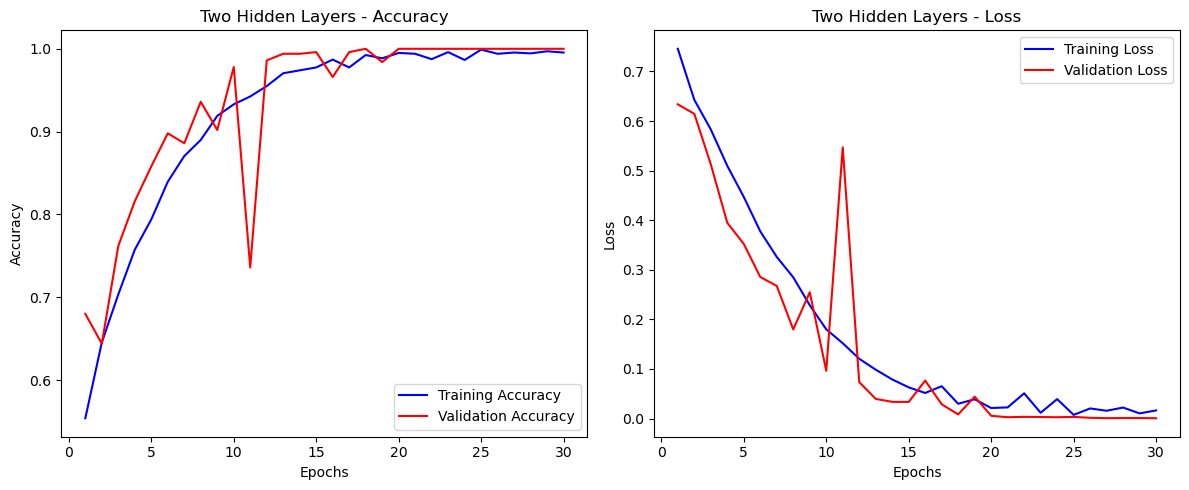

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 1.0000 - loss: 0.0011
Epoch 1/7
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.5081 - loss: 3.0457 - val_accuracy: 0.6660 - val_loss: 0.5914
Epoch 2/7
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.6667 - loss: 0.6070 - val_accuracy: 0.7580 - val_loss: 0.4972
Epoch 3/7
36/63 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.7418 - loss: 0.5438

KeyboardInterrupt: 

In [5]:
import os
import shutil
import pathlib
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt

# Step 1: Setting Up Paths & Preparing Datasets
base_dir = pathlib.Path("/Users/harivinayak/Interactive Data 25/cats_vs_dogs_small")
train_dir = base_dir / 'train'
small_dir = base_dir / 'small'

# Function to create subsets
def make_subset(subset_name, start_index, end_index):
    for category in ('cats', 'dogs'):
        dir = small_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f'{i}.jpg' for i in range(start_index, end_index)]
        for fname in fnames:
            src = train_dir / category / fname
            dst = dir / fname
            if os.path.exists(src):
                shutil.copy(src, dst)

# Creating subsets for training, validation, and testing
make_subset('train', 0, 1000)       # Q1: Step 1 (500 cats, 500 dogs)
make_subset('validation', 1000, 1500)
make_subset('test', 1500, 2000)

# Data Augmentation Setup
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2)
])

# Loading Datasets
train_dataset = image_dataset_from_directory(
    small_dir / 'train',
    image_size=(180, 180),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    small_dir / 'validation',
    image_size=(180, 180),
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    small_dir / 'test',
    image_size=(180, 180),
    batch_size=32
)

# Visualizing original and augmented images side by side
def visualize_augmented_images(train_dataset, num_images=9):
    plt.figure(figsize=(10, 10))

    # Take a batch of images from the dataset
    images, labels = next(iter(train_dataset))  # Getting the first batch
    
    # Apply data augmentation
    augmented_images = data_augmentation(images)

    # Set up a grid of subplots
    num_rows = 3
    num_cols = 3
    for i in range(num_images):
        ax = plt.subplot(num_rows, num_cols, i + 1)  # Create a subplot for each image
        
        # Show original image
        ax.imshow(images[i].numpy().astype('uint8'))  # Display original image
        ax.set_title(f"Label: {int(labels[i])}")  # Set title to show label
        ax.axis('off')  # Hide axis
    
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

    # Visualize augmented images
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        ax = plt.subplot(num_rows, num_cols, i + 1)
        ax.imshow(augmented_images[i].numpy().astype('uint8'))  # Display augmented image
        ax.set_title(f"Augmented Label: {int(labels[i])}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize augmented images
visualize_augmented_images(train_dataset)

# Plotting Function for Training and Validation Metrics
def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Q1: Models with Different Hidden Layers (One, Two, Three)

# Two Hidden Layers (Initial Model)
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs, outputs)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset)
plot_history(history, "Two Hidden Layers")
model.evaluate(test_dataset)

# One Hidden Layer
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_one = keras.Model(inputs, outputs)
model_one.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_one = model_one.fit(train_dataset, epochs=7, validation_data=validation_dataset)
plot_history(history_one, "One Hidden Layer")
model_one.evaluate(test_dataset)

# Three Hidden Layers
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_three = keras.Model(inputs, outputs)
model_three.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_three = model_three.fit(train_dataset, epochs=30, validation_data=validation_dataset)
plot_history(history_three, "Three Hidden Layers")
model_three.evaluate(test_dataset)

# Q2: Increasing Training Sample Size and Optimizing Network
# Here, we increase the number of samples to 2000 for both cats and dogs.
make_subset('train', 0, 2000)  # Updated dataset for increased size

train_dataset_large = image_dataset_from_directory(
    small_dir / 'train',
    image_size=(180, 180),
    batch_size=32
)

history_large = model.fit(train_dataset_large, epochs=30, validation_data=validation_dataset)
plot_history(history_large, "Increased Training Sample Size")
model.evaluate(test_dataset)

#Instantiating and freezing the VGG16 convolutional base:
conv_base = keras.applications.vgg16.VGG16(
weights= "imagenet", include_top=False)
conv_base. trainable = False
Printing the list of trainable weights before and after freezing:
conv_base. trainable = True
print ("This is the number of trainable weights ", len (conv_base. trainable_weights))
This is the number of trainable weights before freezing the conv base: 26
conv_base. trainable = False
print("This is the number of trainable weights ", len (conv_base. trainable_weights))

# Q3: MSE Loss Function
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_mse = keras.Model(inputs, outputs)
model_mse.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_mse = model_mse.fit(train_dataset, epochs=7, validation_data=validation_dataset)
plot_history(history_mse, "MSE Loss Function")

model_mse.evaluate(test_dataset)

# Q4: Tanh Activation Function
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(32, kernel_size=3, activation='tanh')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, kernel_size=3, activation='tanh')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_tanh = keras.Model(inputs, outputs)
model_tanh.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_tanh = model_tanh.fit(train_dataset, epochs=3, validation_data=validation_dataset)
plot_history(history_tanh, "Tanh Activation Function")
model_tanh.evaluate(test_dataset)

# Save the final models
model.save('cats_vs_dogs_model.h5')
model_one.save('cats_vs_dogs_model_one.h5')
model_three.save('cats_vs_dogs_model_three.h5')
model_mse.save('cats_vs_dogs_model_mse.h5')
model_tanh.save('cats_vs_dogs_model_tanh.h5')
